In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set_context(font_scale=2)

# Imputing missing values
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Evaluating Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Helpers
import itertools

In [2]:
data = pd.read_csv("D:/Nikkidata/ren/csv/RRDai_NUM.csv")

In [3]:
data.profile_report()

AttributeError: 'DataFrame' object has no attribute 'profile_report'

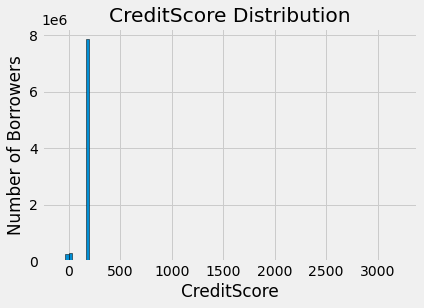

In [4]:
import matplotlib.pyplot as plt
# Histogram of the CreditScore
plt.style.use('fivethirtyeight')
plt.hist(data['CreditScore'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('CreditScore'); plt.ylabel('Number of Borrowers'); 
plt.title('CreditScore Distribution');

In [3]:
# Create a list of borrowers with more than 100 measurements
types = data.dropna(subset=['CreditScore'])
types = types['MaritalStatus'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for building categories
%pylab
figsize(12, 10)

import seaborn as sns
# Plot each building
for b_type in types:
    # Select the MaritalStatus type
    subset = data[data['MaritalStatus'] == b_type]
    
    # Density plot of CreditScore
    sns.kdeplot(subset['CreditScore'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('CreditScore', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of CreditScore by MaritalStatus Type', size = 28);
plt.legend()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [5]:
#Find all correlations with the score and sort 
correlations_data = data.corr()['CreditScore'].sort_values()

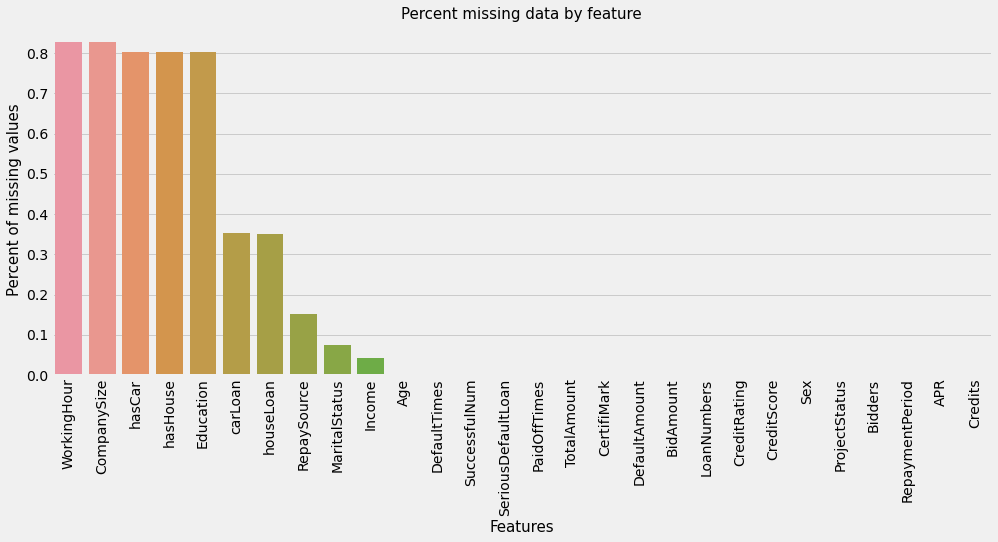

In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()
plt.show()

In [15]:
print(correlations_data)

APR                  -0.511184
CompanySize          -0.458040
BidAmount            -0.274675
SeriousDefaultLoan   -0.139854
DefaultTimes         -0.135999
RepaymentPeriod      -0.112495
Sex                  -0.101123
Age                  -0.089787
DefaultAmount        -0.063782
carLoan              -0.040302
houseLoan            -0.019972
RepaySource          -0.010014
MaritalStatus         0.022701
Income                0.057125
Bidders               0.083785
LoanNumbers           0.086108
WorkingHour           0.088987
PaidOffTimes          0.099756
Credits               0.117109
TotalAmount           0.122654
hasHouse              0.210446
hasCar                0.214635
SuccessfulNum         0.276071
Education             0.383492
CertifiMark           0.896515
CreditScore           1.000000
Name: CreditScore, dtype: float64


In [7]:
#Find all correlations with the score and sort 
data.corr()['APR'].sort_values()

CreditScore          -0.511184
CertifiMark          -0.472513
Education            -0.335842
hasCar               -0.171663
WorkingHour          -0.167826
Credits              -0.153435
TotalAmount          -0.143329
Bidders              -0.134546
Income               -0.106991
hasHouse             -0.100193
RepaymentPeriod      -0.038134
SuccessfulNum        -0.025666
MaritalStatus        -0.013424
PaidOffTimes          0.012359
Age                   0.021564
DefaultAmount         0.032489
houseLoan             0.037640
Sex                   0.054088
SeriousDefaultLoan    0.072993
BidAmount             0.081154
DefaultTimes          0.085853
carLoan               0.088902
LoanNumbers           0.091629
RepaySource           0.238835
CompanySize           0.251034
APR                   1.000000
Name: APR, dtype: float64

In [17]:
figsize(14, 10)
# Subset to the buildings with most measurements and remove outliers

subset = data[(data['CreditScore'] < 300) & 
             (data['MaritalStatus'].isin(types))]

# Linear Plot of Energy Star Score vs EUI
sns.lmplot('APR', 'CreditScore', 
           data = subset, hue = 'MaritalStatus', 
           scatter_kws={'alpha': 0.8, 's': 32}, fit_reg=False, 
           size = 12, aspect = 1.2)

plt.title('CreditScore vs APR', size = 24)
plt.legend()


C:\Users\mb95424\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mb95424\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [19]:
# List of Variables to find correlation coefficients
features = ['Bidders',
            'Education',
            'Income',
             'PaidOffTimes',
            'APR',
            'CreditScore']

subset = data[features].dropna()

# Remove outliers
subset = subset[subset['CreditScore'] < 500]

In [20]:
# Group by the building type and calculate correlations
corrs = pd.DataFrame(subset.groupby('Education').corr())
corrs = pd.DataFrame(corrs['CreditScore'])

# Format the dataframe for display
corrs = corrs.reset_index()
corrs.columns = ['Education', 'Variable', 'Correlation with Score']
corrs = corrs[corrs['Variable'] != 'CreditScore']
corrs

,Education,Variable,Correlation with Score
0,1.0,Bidders,0.476520
1,1.0,Income,0.273887
2,1.0,PaidOffTimes,0.367586
3,1.0,APR,-0.440418
5,2.0,Bidders,0.352161
6,2.0,Income,0.304726
7,2.0,PaidOffTimes,0.216166
8,2.0,APR,-0.600935
10,3.0,Bidders,0.224274
11,3.0,Income,0.249126


In [8]:
def corr_df(x, corr_val):
    # Dont want to remove correlations between Energy Star Score
    y = x['CreditScore']
    x = x.drop(columns = ['CreditScore'])
    
    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['APR'])
    x['CreditScore'] = y
               
    return x

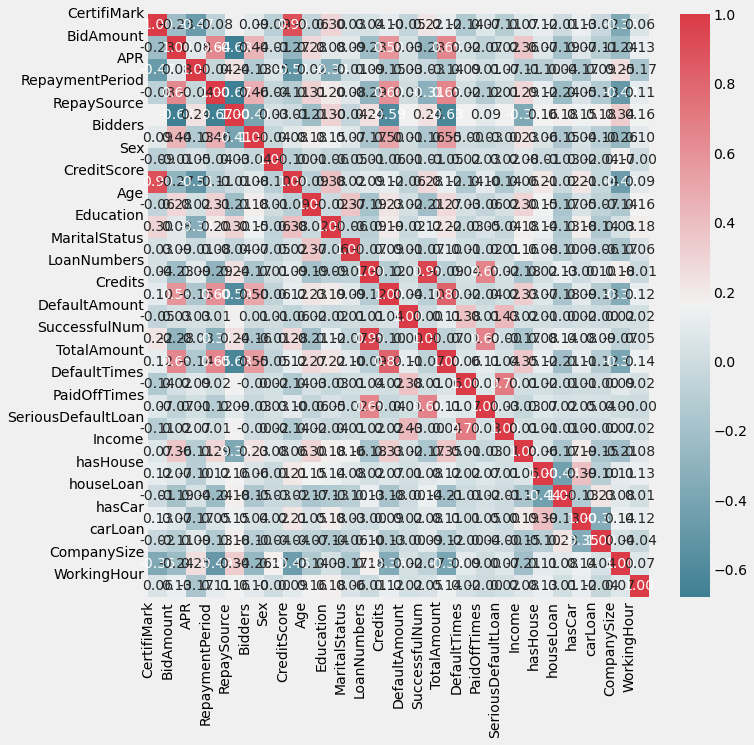

In [9]:
corr = data.corr()
    #Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [22]:
data.shape

(8469232, 28)

In [10]:
new_data = corr_df(data, corr_val = 0.5)

RepaymentPeriod | BidAmount | 0.64
RepaySource | BidAmount | 0.68
Credits | BidAmount | 0.58
Credits | RepaymentPeriod | 0.6
Credits | RepaySource | 0.59
Credits | Bidders | 0.5
SuccessfulNum | LoanNumbers | 0.95
TotalAmount | BidAmount | 0.65
TotalAmount | RepaymentPeriod | 0.65
TotalAmount | RepaySource | 0.63
TotalAmount | Bidders | 0.55
TotalAmount | Credits | 0.82
PaidOffTimes | LoanNumbers | 0.65
PaidOffTimes | SuccessfulNum | 0.66
SeriousDefaultLoan | DefaultTimes | 0.7


In [24]:
new_data.shape

(8469232, 20)

In [84]:
new_data.dtypes

CertifiMark        int64
BidAmount          int64
Bidders            int64
ProjectStatus     object
Sex                int64
CreditRating      object
Age              float64
Education        float64
MaritalStatus    float64
LoanNumbers        int64
DefaultAmount    float64
DefaultTimes     float64
Income           float64
hasHouse         float64
houseLoan        float64
hasCar           float64
carLoan          float64
CompanySize      float64
WorkingHour      float64
CreditScore        int64
dtype: object

In [11]:
log_data = new_data.copy()

for col in new_data.select_dtypes('number').columns:
    log_data['log_%s' % col] = np.log10(new_data[col])
    
log_data = log_data.replace({-np.inf: np.nan})

C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mb95424\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
for col in log_data.select_dtypes('number').columns:
    if np.any(np.isinf(log_data[col])):
        print(col)

In [13]:
log_data.corr()['CreditScore'].sort_values()

log_DefaultTimes    -0.574718
log_CompanySize     -0.471538
CompanySize         -0.458040
log_BidAmount       -0.345698
BidAmount           -0.274675
DefaultTimes        -0.135999
log_DefaultAmount   -0.129936
log_Age             -0.111718
log_Sex             -0.101123
Sex                 -0.101123
Age                 -0.089787
DefaultAmount       -0.063782
log_carLoan         -0.040302
carLoan             -0.040302
log_Bidders         -0.027968
houseLoan           -0.019972
log_houseLoan       -0.019972
log_MaritalStatus    0.019418
MaritalStatus        0.022701
Income               0.057125
log_WorkingHour      0.061266
Bidders              0.083785
LoanNumbers          0.086108
WorkingHour          0.088987
log_Income           0.102349
log_LoanNumbers      0.117664
hasHouse             0.210446
log_hasHouse         0.210446
hasCar               0.214635
log_hasCar           0.214635
Education            0.383492
log_Education        0.400246
CertifiMark          0.896515
log_Certif

In [14]:
X=data.drop(['CreditScore'],axis=1)
y = data['CreditScore']

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)

X_train= train[['CreditScore']]
y_train = train[['CertifiMark', 'BidAmount', 'APR', 'RepaymentPeriod','RepaySource','Sex','CreditRating','Age','Education',
                 'MaritalStatus','LoanNumbers','Credits','DefaultAmount','SuccessfulNum'
                ,'TotalAmount','DefaultTimes','PaidOffTimes','SeriousDefaultLoan','Income'
                ,'hasHouse','hasCar','carLoan','CompanySize','WorkingHour']]

y_test= test[['CreditScore']]
X_test = train[['CertifiMark', 'BidAmount', 'APR', 'RepaymentPeriod','RepaySource','Sex','CreditRating','Age','Education',
                 'MaritalStatus','LoanNumbers','Credits','DefaultAmount','SuccessfulNum'
                ,'TotalAmount','DefaultTimes','PaidOffTimes','SeriousDefaultLoan','Income'
                ,'hasHouse','hasCar','carLoan','CompanySize','WorkingHour']]


In [17]:
pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8ece0bc08982eb6ea2a88a5f23d2cf7cdcc9afc319c3f62418f3c5489d8e3530
  Stored in directory: c:\users\mb95424\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=b3edf9df993e5d9b64bff7ec203a7727ae231bc9328522840a06e9689f423fed
  Stored in directory: c:\users\mb95424\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash
Note: you may need to restart the kernel to use updated packages.


AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [16]:
# Baseline is mean of training label
baseline = np.mean(y_train)
base_error = np.mean(abs(baseline - y_test))
print('Baseline Error: {:0.4f}.'.format(base_error))

C:\Users\mb95424\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TypeError: unsupported format string passed to Series.__format__

In [ ]:
#Linear Regression

# Create and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions and evaluate
lin_pred = lin_reg.predict(X_test)

print('Linear Regression Error: {:0.4f}.'.format(np.mean(abs(lin_pred - y_test))))

In [ ]:
#Random Forest Regression
# Create and train random forest
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(X_train, y_train)

# Make predicitons and evaluate
rf_reg_pred = rf_reg.predict(X_test)

print('Random Forest Error: {:0.4f}.'.format(np.mean(abs(rf_reg_pred - y_test))))

In [ ]:
print('Random Forest R^2: {:0.4f}.'.format(np.corrcoef(rf_reg_pred, y_test)[0][1]))

In [ ]:
#Interpret Regression Results
figsize(14, 8)

# Plot predictions
ax = plt.subplot(121)
ax.hist(rf_reg_pred, bins = 100)
ax.set_xlabel('CreditScore'); ax.set_ylabel('Count'); 
ax.set_title('Predicted Distribution')

# Plot true values
ax2 = plt.subplot(122)
ax2.hist(y_test, bins = 100)
ax2.set_xlabel('CreditScore'); ax2.set_ylabel('Count'); 
ax2.set_title('Actual Distribution');